## Learning kernel VS Tradition CV
We will compare the difference between kernel obtained by learning and theory and approximation.

In [1]:
import numpy as np
import conv
import matplotlib.pyplot as plt
from check_gradient import eval_numerical_gradient, eval_numerical_gradient_array

### Verifying  Correctness Of Convolution
Before the experiment, we need to verify whether the convolution code written by ourselves is correct.

In [2]:
def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

#### Convolution Forward

In [3]:
x_shape = (2, 3, 4, 4)
w_shape = (3, 3, 4, 4)
x = np.linspace(-0.1, 0.5, num=np.prod(x_shape)).reshape(x_shape)
w = np.linspace(-0.2, 0.3, num=np.prod(w_shape)).reshape(w_shape)
b = np.linspace(-0.1, 0.2, num=3)

conv_param = {'stride': 2, 'padding': 1}
out_orgin, _ = conv.origin_conv_forward(x, w, b, conv_param)
out_im2col, _ = conv.im2col_conv_forward(x, w, b, conv_param)
correct_out = np.array([[[[[-0.08759809, -0.10987781],
                           [-0.18387192, -0.2109216 ]],
                          [[ 0.21027089,  0.21661097],
                           [ 0.22847626,  0.23004637]],
                          [[ 0.50813986,  0.54309974],
                           [ 0.64082444,  0.67101435]]],
                         [[[-0.98053589, -1.03143541],
                           [-1.19128892, -1.24695841]],
                          [[ 0.69108355,  0.66880383],
                           [ 0.59480972,  0.56776003]],
                          [[ 2.36270298,  2.36904306],
                           [ 2.38090835,  2.38247847]]]]])
# Compare your output to ours; difference should be around 1e-8
print ('the orgin implement of conv difference: ', rel_error(out_orgin, correct_out))
print ('the im2col implement of conv difference: ', rel_error(out_im2col, correct_out))

the orgin implement of conv difference:  2.2121476417505994e-08
the im2col implement of conv difference:  2.2121476417505994e-08


#### Convolution Backward

In [4]:
x = np.random.randn(4, 3, 5, 5)
w = np.random.randn(2, 3, 3, 3)
b = np.random.randn(2,)
dout = np.random.randn(4, 2, 5, 5)
conv_param = {'stride': 1, 'padding': 1}

dx_num = eval_numerical_gradient_array(lambda x: conv.origin_conv_forward(x, w, b, conv_param)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: conv.origin_conv_forward(x, w, b, conv_param)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: conv.origin_conv_forward(x, w, b, conv_param)[0], b, dout)

origin_out, origin_cache = conv.origin_conv_forward(x, w, b, conv_param)
origin_dx, origin_dw, origin_db = conv.origin_conv_backward(dout, origin_cache)

# Your errors should be around 1e-9'
print ('Testing conv_backward_naive function')
print ('dx error: ', rel_error(origin_dx, dx_num))
print ('dw error: ', rel_error(origin_dw, dw_num))
print ('db error: ', rel_error(origin_db, db_num))

Testing conv_backward_naive function
dx error:  1.3440703479386337e-09
dw error:  1.433294304496444e-09
db error:  7.88500315527545e-12


In [5]:
x = np.random.randn(4, 3, 5, 5)
w = np.random.randn(2, 3, 3, 3)
b = np.random.randn(2,)
dout = np.random.randn(4, 2, 5, 5)
conv_param = {'stride': 1, 'padding': 1}

dx_num = eval_numerical_gradient_array(lambda x: conv.im2col_conv_forward(x, w, b, conv_param)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: conv.im2col_conv_forward(x, w, b, conv_param)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: conv.im2col_conv_forward(x, w, b, conv_param)[0], b, dout)

im2col_out, im2col_cache = conv.im2col_conv_forward(x, w, b, conv_param)
im2col_dx, im2col_dw, im2col_db = conv.im2col_conv_backward(dout, im2col_cache)

# Your errors should be around 1e-9'
print ('Testing conv_backward_naive function')
print ('dx error: ', rel_error(im2col_dx, dx_num))
print ('dw error: ', rel_error(im2col_dw, dw_num))
print ('db error: ', rel_error(im2col_db, db_num))

Testing conv_backward_naive function
dx error:  1.534469319643336e-08
dw error:  1.3634391860212503e-10
db error:  2.2950859738530264e-11


### Color transformation and edge detection

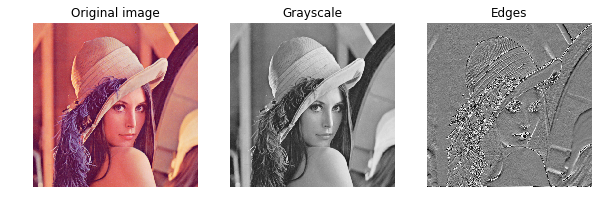

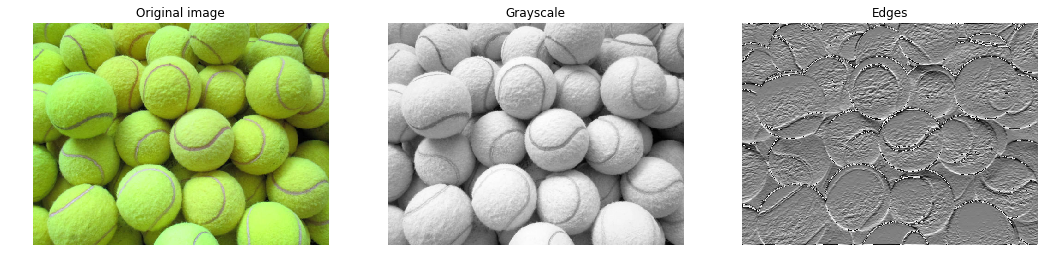

In [6]:
from scipy.misc import imread

# The w_color filter converts the image to grayscale.
w_color = np.zeros((1, 3, 1, 1))
w_color[0, :, 0, 0] =  [0.3, 0.6, 0.1]
b_color = np.array([0])

# Second filter detects horizontal edges in the blue channel.
w_edge = np.zeros((1, 1, 3, 3))
w_edge[0, 0, :, :] = [[1, 2, 1], [0, 0, 0], [-1, -2, -1]]
b_edge = np.array([128])

def imshow_noaxis(img, cmap=None):
    plt.imshow(img.astype('uint8'), cmap =cmap)
    plt.gca().axis('off')

    
def process_show(x, w_color, b_color, w_edge, b_edge, figsize=(10, 10)):
    out_color, _ = conv.im2col_conv_forward(x, w_color, b_color, {'stride': 1, 'padding': 1})
    out_edge, _ = conv.im2col_conv_forward(out_color, w_edge, b_edge, {'stride': 1, 'padding': 1})
    plt.figure(figsize=figsize)
    plt.subplot(1, 3, 1)
    imshow_noaxis(np.transpose(x, (0,2,3,1))[0])
    plt.title('Original image')
    plt.subplot(1, 3, 2)
    imshow_noaxis(out_color[0, 0], cmap='gray')
    plt.title('Grayscale')
    plt.subplot(1, 3, 3)
    imshow_noaxis(out_edge[0, 0], cmap='gray')
    plt.title('Edges')
    plt.show()

lena, ball = imread('./image/lena.jpg'), imread('./image/ball.jpg')

# show the result of lena
lena = np.expand_dims(lena, axis=0)
lena = np.transpose(lena, (0, 3, 1, 2))
process_show(lena, w_color, b_color, w_edge, b_edge)
# show the result of ball
ball = np.expand_dims(ball, axis=0)
ball = np.transpose(ball, (0, 3, 1, 2))
process_show(ball, w_color, b_color, w_edge, b_edge, figsize=(18,18))

### Learning color transformation
##### Define one layer conv

In [7]:
from model import Model
import conv
from loss import L2_loss

class Oneconv(Model):
    def __init_():
        super.__init__(number_layer, network_config , weight_scale)
        
    def inference_network(self, X):
        h1, cache = conv.im2col_conv_forward(X, self.params["W1"], self.params["b1"], {"stride":1, "padding":0})
        return h1, cache

    def loss(self, X, y, mode="train"):
        h1, cache = self.inference_network(X)
        loss, dh1 = L2_loss(h1, y)
        grads = {}
        if mode=="train":
            df, grads["W1"], grads["b1"] = conv.im2col_conv_backward(dh1, cache)
        return loss, grads 

#### Define Solver

It is important to note that the dimension of input is (batch, channels, H, W)
* network_config ={"input":channel of features, "1":("conv",(number of filters, kernel size))}

In [8]:
from solver import Solver

# make dataset
lena_gray, _ = conv.im2col_conv_forward(lena, w_color, b_color, {'stride': 1, 'padding': 0})
data = {
    "X_train":lena,
    "y_train":lena_gray
}

one_conv = Oneconv(number_layer=1, network_config ={"input":3, "1":("conv",(1,1))}, weight_scale=0.1)
solver = Solver(one_conv, data,  
                update_rule='adam',
                optim_config={
                  'learning_rate': 1e-1},
                batch_size=1,
                print_every=10)
solver.train(num_iterations=100)

(Iteration 11 / 100) loss: 1609.556024
(Iteration 21 / 100) loss: 423.867530
(Iteration 31 / 100) loss: 27.937133
(Iteration 41 / 100) loss: 225.185980
(Iteration 51 / 100) loss: 9.441284
(Iteration 61 / 100) loss: 3.552689
(Iteration 71 / 100) loss: 22.449860
(Iteration 81 / 100) loss: 10.259274
(Iteration 91 / 100) loss: 1.216170


In [9]:
one_conv.params["W1"], one_conv.params["b1"]

(array([[[[0.30597829]],
 
         [[0.59829834]],
 
         [[0.08436896]]]]), array([-0.18591809]))

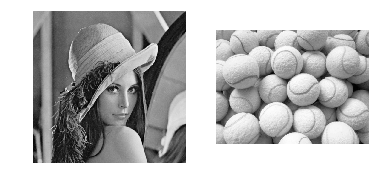

In [15]:
lena_gray, cache = one_conv.inference_network(lena)
ball_gray, cache = one_conv.inference_network(ball)

plt.gca().axis('off')
plt.subplot(1,2,1)
plt.imshow(lena_gray[0][0].astype('uint8'), cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(ball_gray[0][0].astype('uint8'), cmap='gray')
plt.axis('off')
plt.show()